# Iris Clustering Analysis

**Notebook Description**  
This Jupyter Notebook demonstrates a **comprehensive clustering analysis** on the *Iris* dataset. It applies various **data preprocessing techniques** (no processing, normalization, PCA, and normalization + PCA) and explores multiple **cluster counts** (3, 5, 7, 9) for both **K-Means** and **Hierarchical Clustering**. For each configuration, the notebook computes **Silhouette**, **Davies-Bouldin**, and **Calinski-Harabasz** scores, organizing the results into **comparison tables**. 


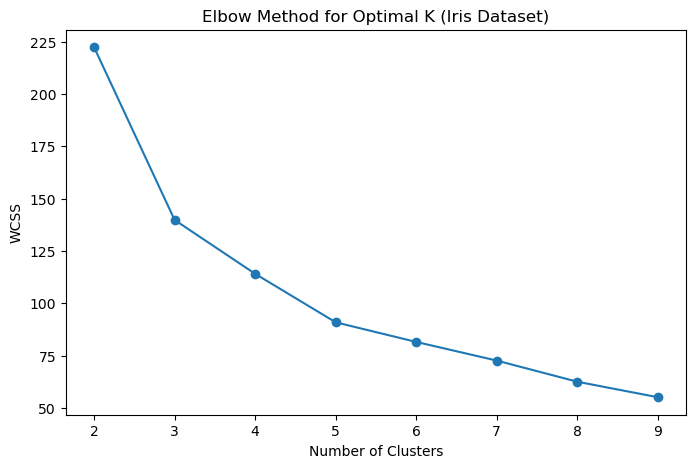

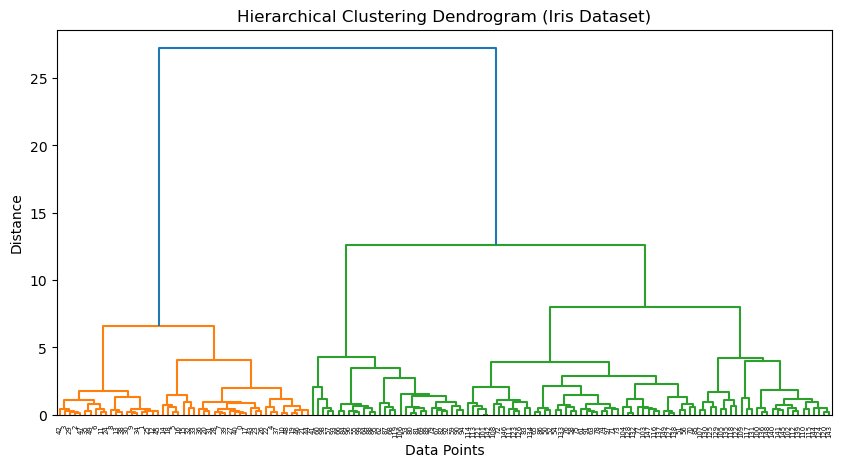

K-Means Silhouette Score: 0.45994823920518646
K-Means Davies-Bouldin Score: 0.8335949464754334
K-Means Calinski-Harabasz Score: 241.90440170183172
Hierarchical Silhouette Score: 0.446689041028591
Hierarchical Davies-Bouldin Score: 0.803466530287675
Hierarchical Calinski-Harabasz Score: 222.7191638221536


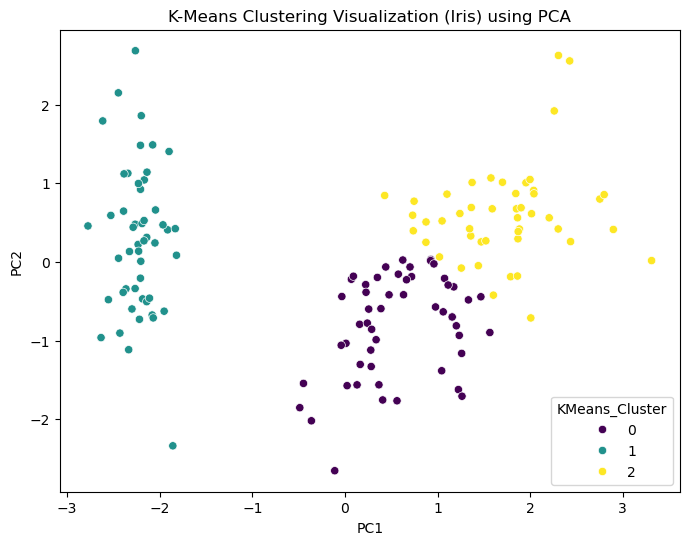

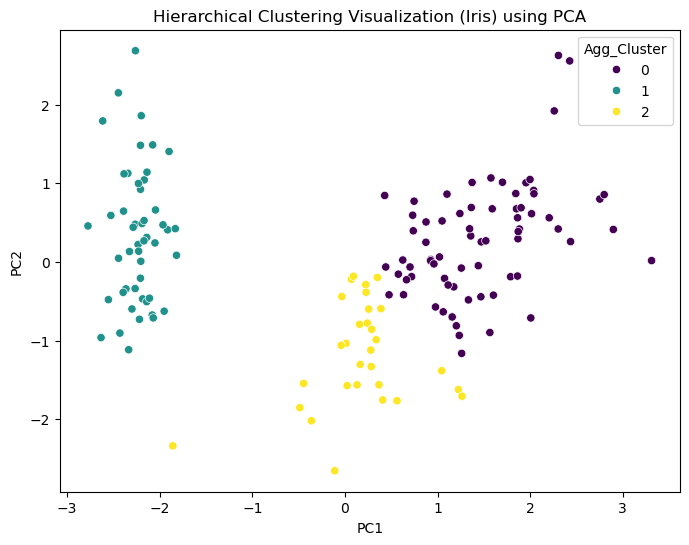

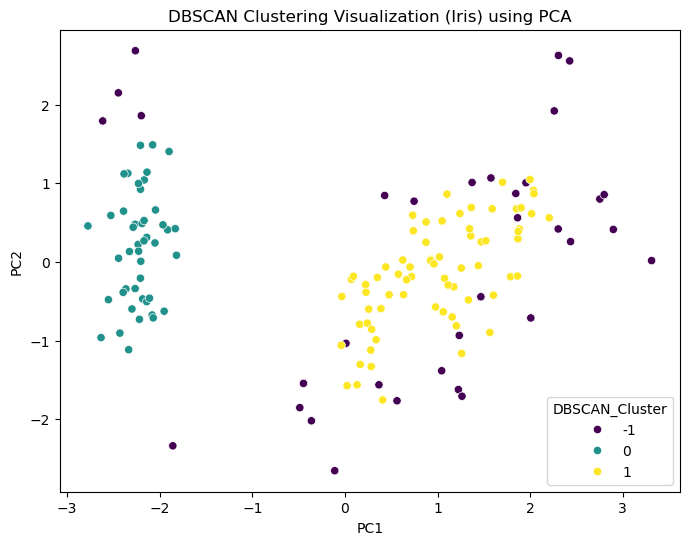

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df.copy()

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means Clustering ###
# Determine the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K (Iris Dataset)')
plt.show()

# For Iris, K=3 is commonly chosen based on prior knowledge
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

### Hierarchical Clustering ###
# Create a linkage matrix and plot a dendrogram to visualize clusters
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Iris Dataset)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering with 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3)
df['Agg_Cluster'] = agg_cluster.fit_predict(X_scaled)

### DBSCAN Clustering ###
# Apply DBSCAN (adjust eps and min_samples as necessary)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

### Evaluation Metrics ###
# Note: DBSCAN may label noise as -1, which can affect evaluation metrics, so we focus on K-Means and Hierarchical
kmeans_silhouette = silhouette_score(X_scaled, df['KMeans_Cluster'])
kmeans_davies = davies_bouldin_score(X_scaled, df['KMeans_Cluster'])
kmeans_calinski = calinski_harabasz_score(X_scaled, df['KMeans_Cluster'])

agg_silhouette = silhouette_score(X_scaled, df['Agg_Cluster'])
agg_davies = davies_bouldin_score(X_scaled, df['Agg_Cluster'])
agg_calinski = calinski_harabasz_score(X_scaled, df['Agg_Cluster'])

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_davies)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski)
print("Hierarchical Silhouette Score:", agg_silhouette)
print("Hierarchical Davies-Bouldin Score:", agg_davies)
print("Hierarchical Calinski-Harabasz Score:", agg_calinski)

### PCA for Visualization ###
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['KMeans_Cluster'] = df['KMeans_Cluster']
df_pca['Agg_Cluster'] = df['Agg_Cluster']
df_pca['DBSCAN_Cluster'] = df['DBSCAN_Cluster']

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis', data=df_pca)
plt.title("K-Means Clustering Visualization (Iris) using PCA")
plt.show()

# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Agg_Cluster', palette='viridis', data=df_pca)
plt.title("Hierarchical Clustering Visualization (Iris) using PCA")
plt.show()

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='viridis', data=df_pca)
plt.title("DBSCAN Clustering Visualization (Iris) using PCA")
plt.show()

# Save the results to a CSV file
df.to_csv("iris_clustering_results.csv", index=False)


In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


iris = load_iris()
X_raw = pd.DataFrame(iris.data, columns=iris.feature_names)

# 1) No Data Processing
X_no_processing = X_raw.values

# 2) Normalization (Standard Scaling)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_raw)

# 3) PCA (2 components for dimension reduction)
#    NOTE: Typically, you might keep enough components to explain sufficient variance,
#          but for demonstration, let's reduce to 2D.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_raw)

# 4) Normalization + PCA
X_norm_pca = PCA(n_components=2).fit_transform(X_norm)


transformations = {
    "No Processing": X_no_processing,
    "Normalization": X_norm,
    "PCA": X_pca,
    "Norm+PCA": X_norm_pca
}


def compute_metrics(X, labels):
    """
    Given data X and cluster labels, compute Silhouette, Davies-Bouldin,
    and Calinski-Harabasz scores.
    """
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    return sil, db, ch



cluster_range = [3, 5, 7, 9]


metrics_kmeans = {}

for transform_name, X_t in transformations.items():
    for c in cluster_range:
        kmeans = KMeans(n_clusters=c, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_t)
        sil, db, ch = compute_metrics(X_t, labels)
        metrics_kmeans[(c, transform_name)] = (sil, ch, db)  # order them (sil, ch, db)

# Convert to a DataFrame with a format similar to your example
# We'll create rows for each metric, columns for each combination of (c, transform).
rows = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
index = pd.Index(rows, name="Metrics")

# Multi-level columns: top level = c=3,5,7,9; second level = transform
columns = pd.MultiIndex.from_product(
    [ [f"c={c}" for c in cluster_range], list(transformations.keys()) ],
    names=["#Clusters", "DataProcessing"]
)

df_kmeans = pd.DataFrame(index=index, columns=columns, dtype=float)

for (c, transform_name), (sil, ch, db) in metrics_kmeans.items():
    df_kmeans.loc["Silhouette",  (f"c={c}", transform_name)] = round(sil, 3)
    df_kmeans.loc["Calinski-Harabasz", (f"c={c}", transform_name)] = round(ch, 3)
    df_kmeans.loc["Davies-Bouldin", (f"c={c}", transform_name)] = round(db, 3)

print("K-Means Clustering Comparison (Iris Dataset)")
display(df_kmeans)


#    HIERARCHICAL CLUSTERING

# We'll do the same for AgglomerativeClustering
metrics_hier = {}

for transform_name, X_t in transformations.items():
    for c in cluster_range:
        hier = AgglomerativeClustering(n_clusters=c)
        labels = hier.fit_predict(X_t)
        sil, db, ch = compute_metrics(X_t, labels)
        metrics_hier[(c, transform_name)] = (sil, ch, db)

df_hier = pd.DataFrame(index=index, columns=columns, dtype=float)
for (c, transform_name), (sil, ch, db) in metrics_hier.items():
    df_hier.loc["Silhouette",  (f"c={c}", transform_name)] = round(sil, 3)
    df_hier.loc["Calinski-Harabasz", (f"c={c}", transform_name)] = round(ch, 3)
    df_hier.loc["Davies-Bouldin", (f"c={c}", transform_name)] = round(db, 3)

print("Hierarchical Clustering Comparison (Iris Dataset)")
display(df_hier)


df_kmeans.to_csv("iris_kmeans_comparison.csv")
df_hier.to_csv("iris_hier_comparison.csv")




K-Means Clustering Comparison (Iris Dataset)


#Clusters                   c=3                                           c=5  \
DataProcessing    No Processing Normalization      PCA Norm+PCA No Processing   
Metrics                                                                         
Silhouette                0.553         0.460    0.598    0.509         0.491   
Calinski-Harabasz       561.628       241.904  693.708  293.857       495.370   
Davies-Bouldin            0.662         0.834    0.565    0.710         0.816   

#Clusters                                                   c=7                \
DataProcessing    Normalization      PCA Norm+PCA No Processing Normalization   
Metrics                                                                         
Silhouette                0.346    0.552    0.416         0.354         0.320   
Calinski-Harabasz       202.952  685.027  278.549       449.536       173.052   
Davies-Bouldin            0.948    0.632    0.771         0.979         0.991   

#Clusters                                     c=9                         \
DataProcessing         PCA Norm+PCA No Processing Normalization      PCA   
Metrics                                                                    
Silhouette           0.434    0.415         0.313         0.342    0.427   
Calinski-Harabasz  696.507  262.627       406.867       174.231  723.566   
Davies-Bouldin       0.752    0.778         1.032         0.903    0.727   

#Clusters                   
DataProcessing    Norm+PCA  
Metrics                     
Silhouette           0.441  
Calinski-Harabasz  292.302  
Davies-Bouldin       0.668

Hierarchical Clustering Comparison (Iris Dataset)


#Clusters                   c=3                                           c=5  \
DataProcessing    No Processing Normalization      PCA Norm+PCA No Processing   
Metrics                                                                         
Silhouette                0.554         0.447    0.598    0.511         0.484   
Calinski-Harabasz       558.058       222.719  688.618  286.329       488.485   
Davies-Bouldin            0.656         0.803    0.560    0.705         0.820   

#Clusters                                                   c=7                \
DataProcessing    Normalization      PCA Norm+PCA No Processing Normalization   
Metrics                                                                         
Silhouette                0.331    0.549    0.404         0.342         0.317   
Calinski-Harabasz       192.681  665.883  254.996       431.982       161.714   
Davies-Bouldin            0.974    0.653    0.791         1.031         0.971   

#Clusters                                     c=9                         \
DataProcessing         PCA Norm+PCA No Processing Normalization      PCA   
Metrics                                                                    
Silhouette           0.434    0.371         0.330         0.311    0.402   
Calinski-Harabasz  667.256  245.188       388.650       155.685  672.087   
Davies-Bouldin       0.694    0.809         0.997         0.879    0.740   

#Clusters                   
DataProcessing    Norm+PCA  
Metrics                     
Silhouette           0.418  
Calinski-Harabasz  279.430  
Davies-Bouldin       0.714